# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OLSDataset.txt',sep='\s+')

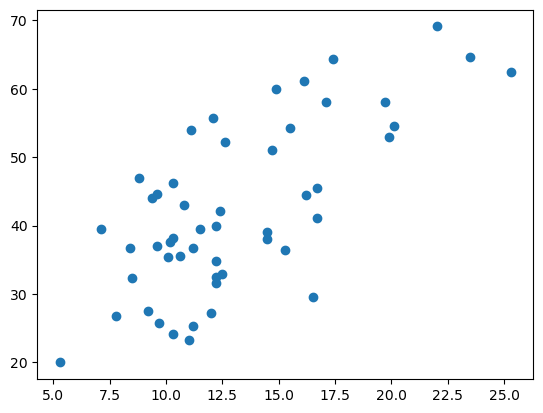

In [3]:
plt.scatter(data['PovPct'], data['TeenBrth']) 

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [91]:
from sklearn.model_selection import train_test_split
def regression_artesanal(rand_seed):
    y = data['TeenBrth']
    x = data['PovPct']
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = rand_seed, shuffle = True)
    size_base = 2;
    A=np.zeros((len(x_train),size_base))
    A[:,0] = np.ones(x_train.shape)
    A[:,1] = x_train;
    #print(A)

    xx=np.linspace(0,np.max(x),100)
    #print(xx.shape)

    #Solución ajuste lineal
    cl = (np.linalg.inv(A.T@A)@A.T)@y_train
    #print(cl)
    yy = cl[0]+cl[1]*xx
    plt.plot(x_train,y_train,'bo',label='Train points')
    plt.plot(x_test,y_test,'ro',label='Test points')
    plt.plot(xx,yy,'g',label='Prediction')
    plt.title('Lineal regression')
    plt.xlabel('Poverty')
    plt.ylabel('Teen Birth')
    plt.legend(loc='best')
    plt.show()
    errorl=(np.linalg.norm(cl[0]+cl[1]*x_test - y_test))**2/len(y_test)
    print('MSE in test:',errorl)
    return xx,yy

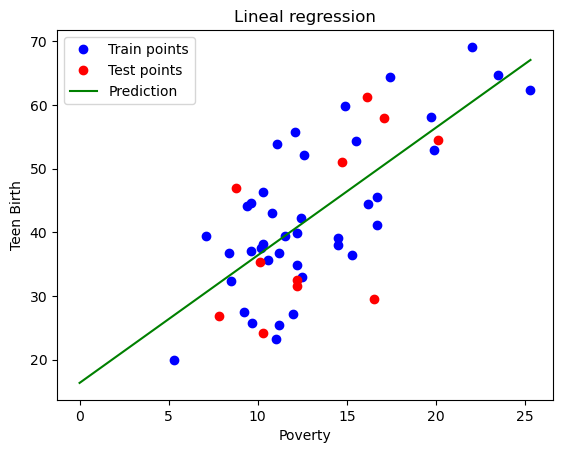

MSE in test: 105.10942862242952


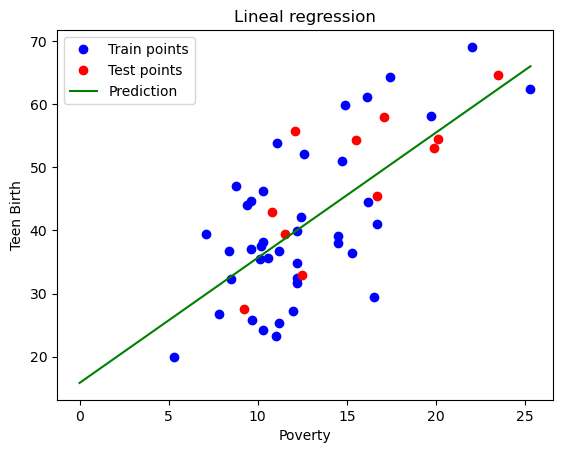

MSE in test: 48.901380143269556


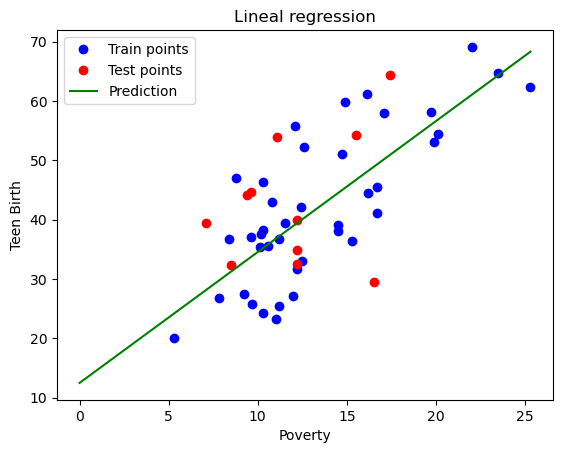

MSE in test: 121.89789733925824


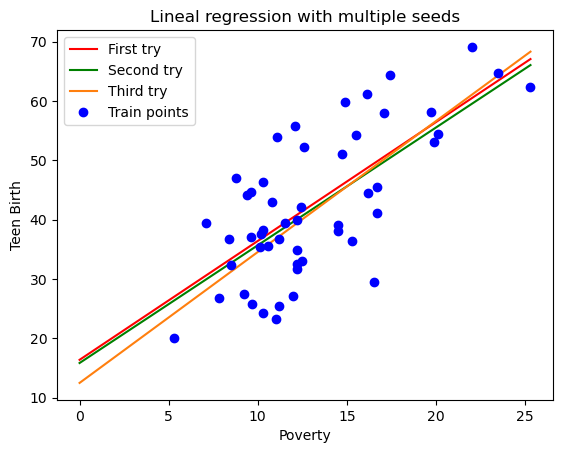

In [92]:
y = data['TeenBrth']
x = data['PovPct']
x1,y1 = regression_artesanal(3432221)
x2,y2 = regression_artesanal(224)
x3,y3 = regression_artesanal(22332)
plt.plot(x1,y1, 'r', label = 'First try')
plt.plot(x2,y2, 'g', label = 'Second try')
plt.plot(x3,y3, 'tab:orange', label = 'Third try')
plt.title('Lineal regression with multiple seeds')
plt.plot(x,y,'bo',label='Train points')
plt.xlabel('Poverty')
plt.ylabel('Teen Birth')
plt.legend(loc='best')
plt.legend(loc='best')
plt.show()

# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [93]:
X = data[['PovPct','ViolCrime']]
y = data['TeenBrth']

In [94]:
X = X.to_numpy()
y = y.to_numpy()

In [115]:
def multi_regression_artesanal(x,y,rand_seed):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = rand_seed, shuffle = True)
    size_base = 3;
    A=np.zeros((len(x_train),size_base))
    #print(x_train.shape[0])
    A[:,0] = np.ones(x_train.shape[0])
    A[:,1] = x_train[:,0];
    A[:,2] = x_train[:,1];
    #print(A)

    xx=np.linspace(0,np.max(x),100)
    #print(xx.shape)

    #Solución ajuste lineal
    cl = (np.linalg.inv(A.T@A)@A.T)@y_train
    #print(cl)
    yy = cl[0]+cl[1]*xx
    errorl=(np.linalg.norm(cl[0]+cl[1]*x_test[:,0]+cl[2]*x_test[:,1] - y_test))**2/len(y_test)
    print('MSE in test:',errorl)
    return xx,yy

In [120]:
res = multi_regression_artesanal(X,y,56)
res = multi_regression_artesanal(X,y,0)
res = multi_regression_artesanal(X,y,21)
res = multi_regression_artesanal(X,y,4)

MSE in test: 62.73961834454197
MSE in test: 127.25567198019763
MSE in test: 63.38248102448736
MSE in test: 41.034283405207894


In [ ]:
import statsmodels.api as sm

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [122]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2))
    return np.array(arr)

In [123]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

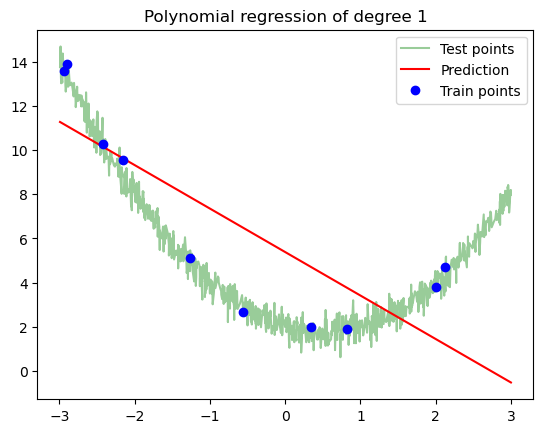

MSE in train: 6.480769070435632
MSE in test: 10.094917634995229


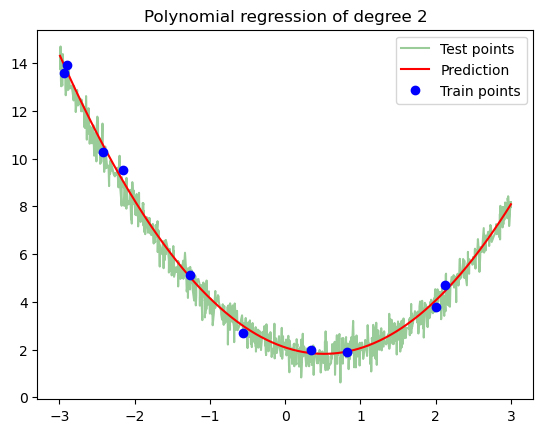

MSE in train: 0.07595141204691755
MSE in test: 0.1767573244963557


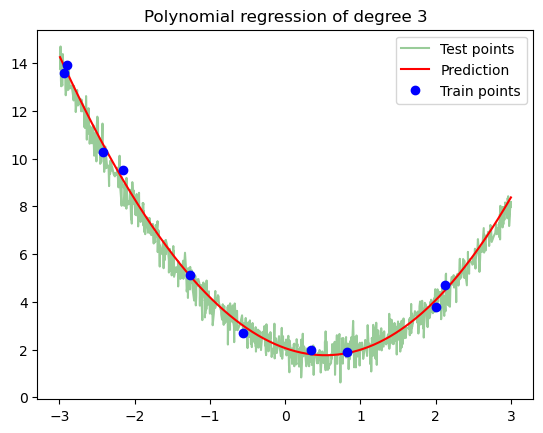

MSE in train: 0.07420323799732845
MSE in test: 0.1881179587574534


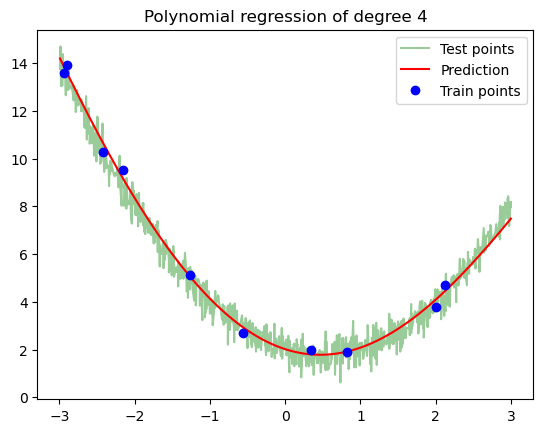

MSE in train: 0.07218109177132687
MSE in test: 0.19732799752496696


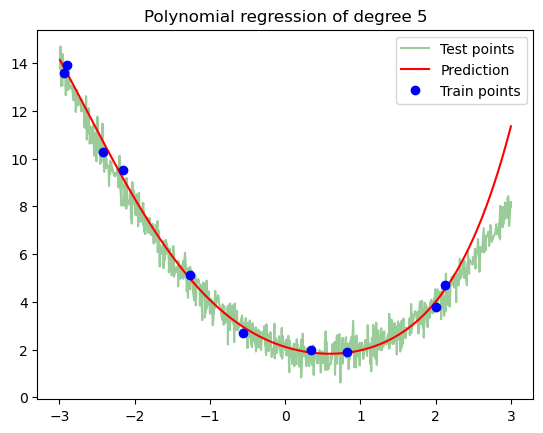

MSE in train: 0.06911666644118175
MSE in test: 0.5676599118006718


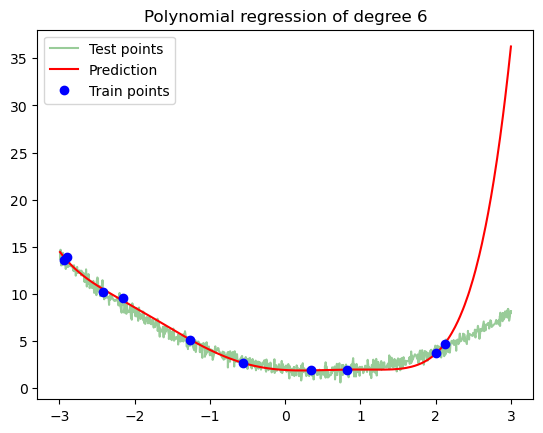

MSE in train: 0.035509207151784364
MSE in test: 25.010377718615608


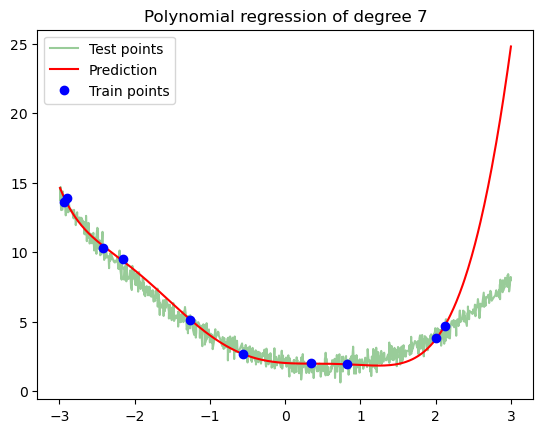

MSE in train: 0.033080095314442316
MSE in test: 10.148411780807008


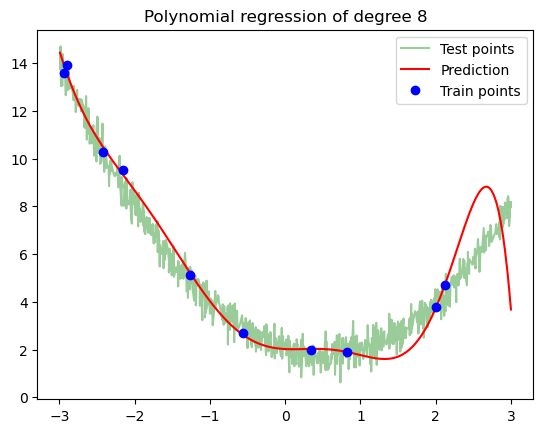

MSE in train: 0.03161896640760709
MSE in test: 0.8360120682416586


In [171]:
X_train,y_train = sample_ds(10)
X_test,y_test = sample_ds(1000)
for i in range(1,9):
    poly = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = poly.fit_transform(X_train.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    test_features = poly.fit_transform(X_test.reshape(-1, 1))
    y_pred = poly_reg_model.predict(test_features)
    y_pred_train = poly_reg_model.predict(poly_features)
    plt.figure(i)
    X_sorted, pred_sorted = zip(*sorted(zip(X_test, y_pred)))
    X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test, y_test)))
    plt.plot(X_test_sorted,y_test_sorted,'g',label='Test points', alpha = 0.4)
    plt.plot(X_sorted, pred_sorted,'r',label='Prediction')
    plt.plot(X_train,y_train,'bo',label='Train points')
    plt.title('Polynomial regression of degree ' + str(i))
    plt.legend(loc='best')
    plt.show()
    mse_train = (np.linalg.norm(y_pred_train - y_train))**2/len(y_train)
    print('MSE in train:',mse_train)
    mse_test = (np.linalg.norm(y_pred - y_test))**2/len(y_test)
    print('MSE in test:',mse_test)